## Evaluating the models with the Test Set 

In [1]:
import sys 
sys.path.append('../')
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import math

import time
import timeit
from NN import activation_functions, loss_functions
import NN.network as network

from utils import dataset_helper
from utils import custom_scores
from importlib import reload 


base_dir = '../data/fashion'
print(os.listdir(base_dir))

['train-labels-idx1-ubyte.gz', 'train-images-idx3-ubyte.gz', 't10k-images-idx3-ubyte.gz', 't10k-labels-idx1-ubyte.gz']


/root/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
from utils import mnist_reader, dataset_helper
X, y = mnist_reader.load_mnist('../data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('../data/fashion', kind='t10k')

In [3]:
X = X.copy() / 255.

Given the dtypes, there is no possibility of negative values in the dataset. 

In [4]:
nclasses =10
X_train, X_val, y_train, y_val = train_test_split(
        X, y, test_size=0.05, random_state=42)    
y_train = dataset_helper.one_hot_encode(y_train, nclasses)
y_val = dataset_helper.one_hot_encode(y_val, nclasses)

In [5]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((57000, 784), (3000, 784), (57000, 10), (3000, 10))

In [6]:
lr = 0.0001
b_sz = 256
eps = np.finfo(np.float64).eps
nfeatures  = X_train.shape[1]
epoch_sz = X_train.shape[0]
max_iter = 250 * (epoch_sz // b_sz) 
print_interval = 10 * (epoch_sz // b_sz) 

## 3 Hidden Layers =  128 -> 256 ->  100

Model Summary
-------------------------------
H1      (input=784, neurons=128, activation=relu)
H2      (input=128, neurons=256, activation=relu)
H3      (input=256, neurons=100, activation=relu)
soft    (input=100, neurons=10, activation=softmax)
-------------------------------

Shuffled
It: 2220 Batch: 213 Epoch 9 Train Loss: 0.09809867 lr: 0.000100 Val Loss: 0.07503903 Val Acc 0.84833333
It: 4440 Batch: 203 Epoch 19 Train Loss: 0.06831877 lr: 0.000100 Val Loss: 0.06602583 Val Acc 0.86466667
It: 6660 Batch: 193 Epoch 29 Train Loss: 0.06023065 lr: 0.000100 Val Loss: 0.06225947 Val Acc 0.87733333
It: 8880 Batch: 183 Epoch 39 Train Loss: 0.05485930 lr: 0.000100 Val Loss: 0.06070438 Val Acc 0.88400000
It: 11100 Batch: 173 Epoch 49 Train Loss: 0.05061611 lr: 0.000100 Val Loss: 0.05811833 Val Acc 0.88533333
It: 13320 Batch: 163 Epoch 59 Train Loss: 0.04708994 lr: 0.000100 Val Loss: 0.05740151 Val Acc 0.88466667
It: 15540 Batch: 153 Epoch 69 Train Loss: 0.04410284 lr: 0.000100 Val Loss: 0.0

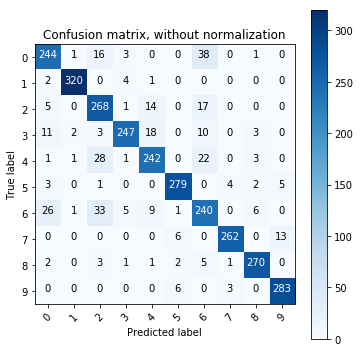

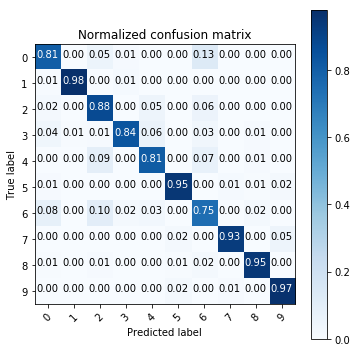

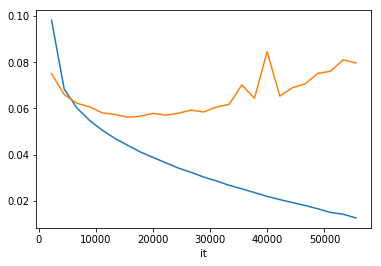

In [7]:
reload(custom_scores)
reload(dataset_helper)
reload(loss_functions)
reload(activation_functions)
reload(network)
reload(dataset_helper)


h1 = network.Layer(nfeatures, 512, 'relu',  label="H1")
h3 = network.Layer(512, 100, 'relu',  label="H3")
o1 = network.Layer(100, nclasses, 'softmax', label="soft")

model = network.NN(loss='cross_entropy')
model.add_layer(h1)
model.add_layer(h2)
model.add_layer(h3)
model.add_layer(o1)
model.summary()

print("")
model.fit(X_train, y_train, max_iter=max_iter, 
          lr=lr, epsilon=eps, b_sz = b_sz,
          X_val=X_val, Y_val=y_val,
          print_interval=print_interval)
iteraction_log = network.get_iteration_log()

Y_ = np.array(model.predict(X_val)).argmax(axis=-1)
reload(custom_scores)
custom_scores.evaluate_multiclass(y_val=y_val.argmax(axis=-1), y_pred=Y_)
iteraction_log.index = iteraction_log.it
iteraction_log.error_train.plot()
iteraction_log.error_val.plot()

Validation Stats...
Accuracy: 0.817
Precision: 0.836
Recall: 0.817
F1 Score: 0.826330
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9}
Confusion matrix, without normalization
Normalized confusion matrix


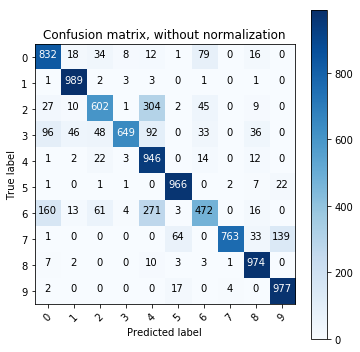

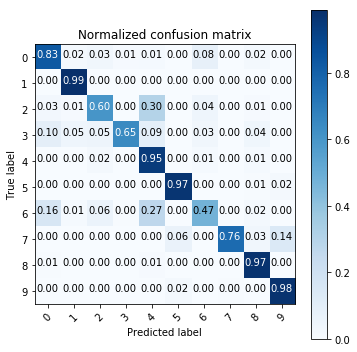

In [8]:
Y_pred = np.array(model.predict(X_test)).argmax(axis=-1)
reload(custom_scores)
custom_scores.evaluate_multiclass(y_val=y_test, y_pred=Y_pred)


## 2 layered 512 -> 100

Model Summary
-------------------------------
H1      (input=784, neurons=512, activation=relu)
H3      (input=512, neurons=100, activation=relu)
soft    (input=100, neurons=10, activation=softmax)
-------------------------------

Shuffled
It: 2220 Batch: 213 Epoch 9 Train Loss: 0.08494350 lr: 0.000100 Val Loss: 0.07025922 Val Acc 0.86166667
It: 4440 Batch: 203 Epoch 19 Train Loss: 0.06372249 lr: 0.000100 Val Loss: 0.06472001 Val Acc 0.87166667
It: 6660 Batch: 193 Epoch 29 Train Loss: 0.05689371 lr: 0.000100 Val Loss: 0.05955897 Val Acc 0.88033333
It: 8880 Batch: 183 Epoch 39 Train Loss: 0.05170012 lr: 0.000100 Val Loss: 0.05823122 Val Acc 0.88033333
It: 11100 Batch: 173 Epoch 49 Train Loss: 0.04766487 lr: 0.000100 Val Loss: 0.05454783 Val Acc 0.89100000
It: 13320 Batch: 163 Epoch 59 Train Loss: 0.04438082 lr: 0.000100 Val Loss: 0.06565364 Val Acc 0.86466667
It: 15540 Batch: 153 Epoch 69 Train Loss: 0.04117871 lr: 0.000100 Val Loss: 0.05846206 Val Acc 0.88333333
It: 17760 Batch: 143 Ep

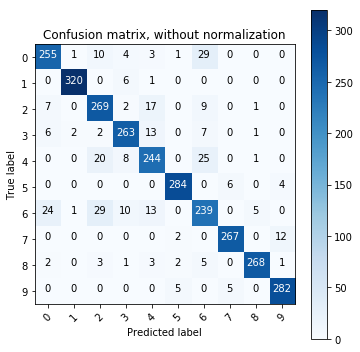

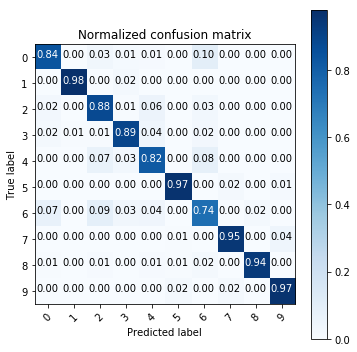

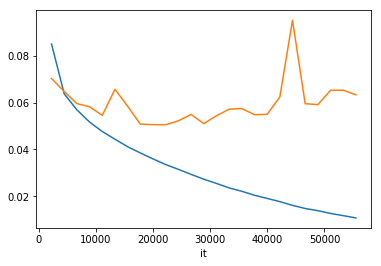

In [14]:
reload(custom_scores)
reload(dataset_helper)
reload(loss_functions)
reload(activation_functions)
reload(network)
reload(dataset_helper)


h1 = network.Layer(nfeatures, 512, 'relu',  label="H1")
h2 = network.Layer(512, 100, 'relu',  label="H3")
o1 = network.Layer(100, nclasses, 'softmax', label="soft")

model = network.NN(loss='cross_entropy')
model.add_layer(h1)
model.add_layer(h2)
model.add_layer(o1)
model.summary()

print("")
model.fit(X_train, y_train, max_iter=max_iter, 
          lr=lr, epsilon=eps, b_sz = b_sz,
          X_val=X_val, Y_val=y_val,
          print_interval=print_interval)
iteraction_log = network.get_iteration_log()

Y_ = np.array(model.predict(X_val)).argmax(axis=-1)
reload(custom_scores)
custom_scores.evaluate_multiclass(y_val=y_val.argmax(axis=-1), y_pred=Y_)
iteraction_log.index = iteraction_log.it
iteraction_log.error_train.plot()
iteraction_log.error_val.plot()

Validation Stats...
Accuracy: 0.861
Precision: 0.868
Recall: 0.861
F1 Score: 0.864067
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9}
Confusion matrix, without normalization
Normalized confusion matrix


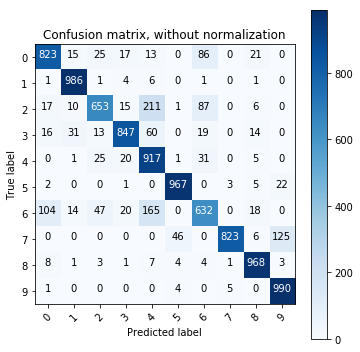

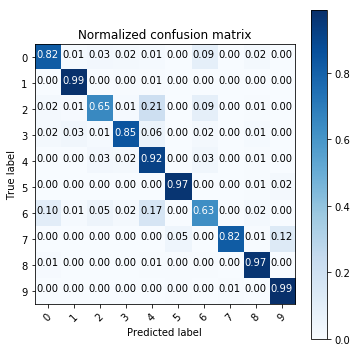

In [15]:
Y_pred = np.array(model.predict(X_test)).argmax(axis=-1)
reload(custom_scores)
custom_scores.evaluate_multiclass(y_val=y_test, y_pred=Y_pred)


## 512 Neurons Hidden Layer

Model Summary
-------------------------------
H1      (input=784, neurons=512, activation=relu)
soft    (input=512, neurons=10, activation=softmax)
-------------------------------

Shuffled
It: 2220 Batch: 213 Epoch 9 Train Loss: 0.07775584 lr: 0.000100 Val Loss: 0.06810131 Val Acc 0.86600000
It: 4440 Batch: 203 Epoch 19 Train Loss: 0.06058141 lr: 0.000100 Val Loss: 0.06467789 Val Acc 0.87266667
It: 6660 Batch: 193 Epoch 29 Train Loss: 0.05505334 lr: 0.000100 Val Loss: 0.06024447 Val Acc 0.88466667
It: 8880 Batch: 183 Epoch 39 Train Loss: 0.05122857 lr: 0.000100 Val Loss: 0.05836378 Val Acc 0.88266667
It: 11100 Batch: 173 Epoch 49 Train Loss: 0.04821612 lr: 0.000100 Val Loss: 0.05663666 Val Acc 0.88733333
It: 13320 Batch: 163 Epoch 59 Train Loss: 0.04563846 lr: 0.000100 Val Loss: 0.05542185 Val Acc 0.88466667
It: 15540 Batch: 153 Epoch 69 Train Loss: 0.04362345 lr: 0.000100 Val Loss: 0.05435804 Val Acc 0.89000000
It: 17760 Batch: 143 Epoch 79 Train Loss: 0.04160305 lr: 0.000100 Val Los

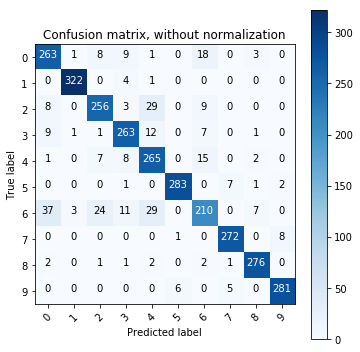

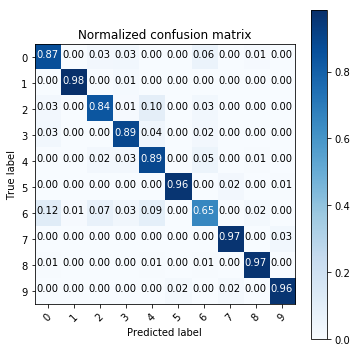

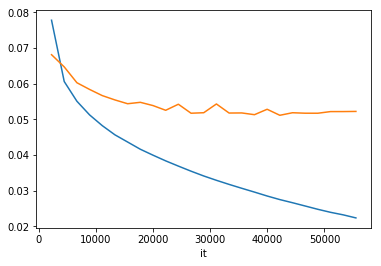

In [9]:
reload(custom_scores)
reload(dataset_helper)
reload(loss_functions)
reload(activation_functions)
reload(network)
reload(dataset_helper)


h1 = network.Layer(nfeatures, 512, 'relu',  label="H1")
o1 = network.Layer(512, nclasses, 'softmax', label="soft")

model = network.NN(loss='cross_entropy')
model.add_layer(h1)
model.add_layer(o1)
model.summary()

print("")
model.fit(X_train, y_train, max_iter=max_iter, 
          lr=lr, epsilon=eps, b_sz = b_sz,
          X_val=X_val, Y_val=y_val,
          print_interval=print_interval)
iteraction_log = network.get_iteration_log()

Y_ = np.array(model.predict(X_val)).argmax(axis=-1)
reload(custom_scores)
custom_scores.evaluate_multiclass(y_val=y_val.argmax(axis=-1), y_pred=Y_)
iteraction_log.index = iteraction_log.it
iteraction_log.error_train.plot()
iteraction_log.error_val.plot()

Validation Stats...
Accuracy: 0.846
Precision: 0.865
Recall: 0.846
F1 Score: 0.855055
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9}
Confusion matrix, without normalization
Normalized confusion matrix


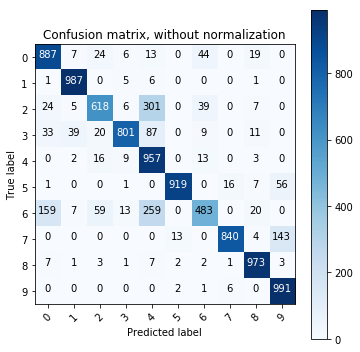

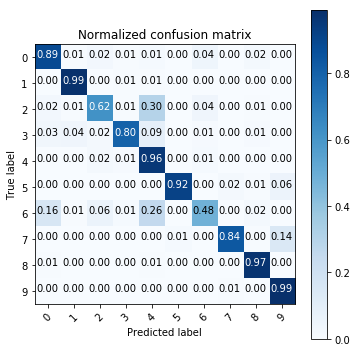

In [10]:
Y_pred = np.array(model.predict(X_test)).argmax(axis=-1)
reload(custom_scores)
custom_scores.evaluate_multiclass(y_val=y_test, y_pred=Y_pred)


## 128 Neurons Hidden Layer

Model Summary
-------------------------------
H1      (input=784, neurons=128, activation=relu)
soft    (input=128, neurons=10, activation=softmax)
-------------------------------

Shuffled
It: 2220 Batch: 213 Epoch 9 Train Loss: 0.08947149 lr: 0.000100 Val Loss: 0.07609179 Val Acc 0.84933333
It: 4440 Batch: 203 Epoch 19 Train Loss: 0.06998210 lr: 0.000100 Val Loss: 0.06990059 Val Acc 0.86200000
It: 6660 Batch: 193 Epoch 29 Train Loss: 0.06447220 lr: 0.000100 Val Loss: 0.06664959 Val Acc 0.86900000
It: 8880 Batch: 183 Epoch 39 Train Loss: 0.06083125 lr: 0.000100 Val Loss: 0.06466949 Val Acc 0.87066667
It: 11100 Batch: 173 Epoch 49 Train Loss: 0.05789007 lr: 0.000100 Val Loss: 0.06356767 Val Acc 0.87666667
It: 13320 Batch: 163 Epoch 59 Train Loss: 0.05551640 lr: 0.000100 Val Loss: 0.06203676 Val Acc 0.87566667
It: 15540 Batch: 153 Epoch 69 Train Loss: 0.05344790 lr: 0.000100 Val Loss: 0.06176646 Val Acc 0.87800000
It: 17760 Batch: 143 Epoch 79 Train Loss: 0.05151262 lr: 0.000100 Val Los

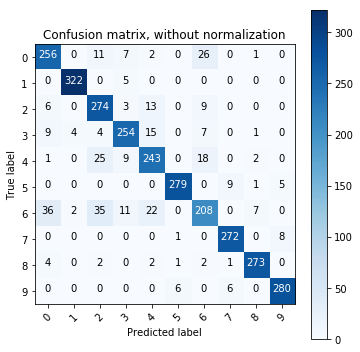

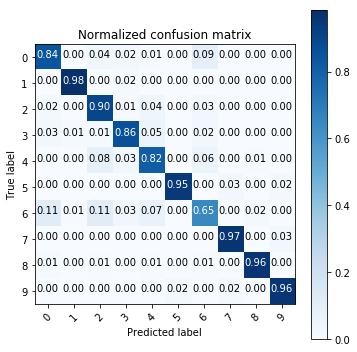

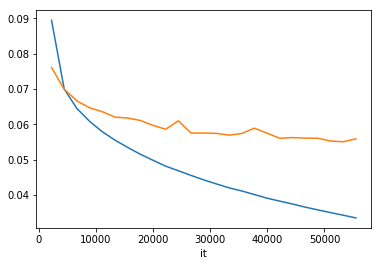

In [11]:
reload(custom_scores)
reload(dataset_helper)
reload(loss_functions)
reload(activation_functions)
reload(network)
reload(dataset_helper)


h1 = network.Layer(nfeatures, 128, 'relu',  label="H1")
o1 = network.Layer(128, nclasses, 'softmax', label="soft")

model = network.NN(loss='cross_entropy')
model.add_layer(h1)
model.add_layer(o1)
model.summary()

print("")
model.fit(X_train, y_train, max_iter=max_iter, 
          lr=lr, epsilon=eps, b_sz = b_sz,
          X_val=X_val, Y_val=y_val,
          print_interval=print_interval)
iteraction_log = network.get_iteration_log()

Y_ = np.array(model.predict(X_val)).argmax(axis=-1)
reload(custom_scores)
custom_scores.evaluate_multiclass(y_val=y_val.argmax(axis=-1), y_pred=Y_)
iteraction_log.index = iteraction_log.it
iteraction_log.error_train.plot()
iteraction_log.error_val.plot()

Validation Stats...
Accuracy: 0.843
Precision: 0.857
Recall: 0.843
F1 Score: 0.849818
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9}
Confusion matrix, without normalization
Normalized confusion matrix


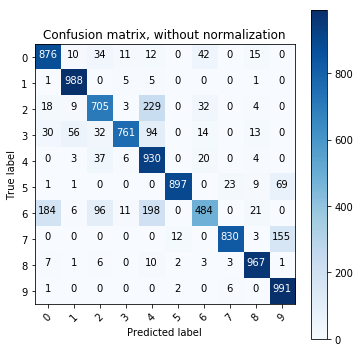

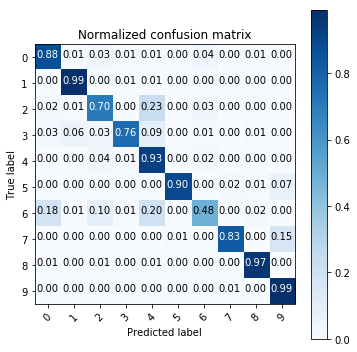

In [12]:
Y_pred = np.array(model.predict(X_test)).argmax(axis=-1)
reload(custom_scores)
custom_scores.evaluate_multiclass(y_val=y_test, y_pred=Y_pred)
